In [1]:
! pip3 install openpyxl


You should consider upgrading via the '/Users/chiguo/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip3 install folium
!pip3 install wget

You should consider upgrading via the '/Users/chiguo/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/chiguo/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')
sns.set_context('talk')

import plotly.express as px
import folium
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
import datetime

pd.pandas.set_option('display.max_columns', None) # display all columns of the dataframe

In [4]:
data = pd.read_excel(
    '/Users/chiguo/Downloads/ANZ_dataset.xlsx')


In [5]:
df = data.copy()

In [6]:
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  balance       date gender  age merchant_suburb  \
0            NaN      Diana    35.39 2018-08-01      F   26         Ashmore   
1            NaN      Diana    21.20 2018-08-01      F   26          Sydney   
2            NaN    Michael     5.71 2018-08-01      M   38          Sydney   
3            NaN     Rhonda  2117.22 2018-08-01      F   40         Buderim   
4            NaN      Diana    17.95 2018-08-01      F   26   Mermaid Beach   

  merchant_state                    extraction  amount  \
0            QLD  2018-08-01T01:01:15.000+0000   16.25   
1            NSW  2018-08-01T01:13:45.000+0000   14.19   
2            NSW  2018-08-01T01:26:15.000+0000    6.42   
3            QLD  2018-08-01T01:38:45.000+0000   40.90   
4            QLD  2018-08-01T01:51:15.000+0000    3.25   

                     transaction_id    country     customer_id  \
0  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
1  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
3  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
4  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

  merchant_long_lat movement  
0     153.38 -27.99    debit  
1     151.21 -33.87    debit  
2     151.21 -33.87    debit  
3     153.05 -26.68    debit  
4     153.44 -28.06    debit

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
df.shape

(12043, 23)

In [9]:
df.describe(include = 'all')

<ipython-input-9-74aa2f970831>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


status  card_present_flag  bpay_biller_code         account  \
count        12043        7717.000000             885.0           12043   
unique           2                NaN               3.0             100   
top     authorized                NaN               0.0  ACC-1598451071   
freq          7717                NaN             883.0             578   
first          NaN                NaN               NaN             NaN   
last           NaN                NaN               NaN             NaN   
mean           NaN           0.802644               NaN             NaN   
std            NaN           0.398029               NaN             NaN   
min            NaN           0.000000               NaN             NaN   
25%            NaN           1.000000               NaN             NaN   
50%            NaN           1.000000               NaN             NaN   
75%            NaN           1.000000               NaN             NaN   
max            NaN           1.000000               NaN             NaN   

       currency       long_lat txn_description  \
count     12043          12043           12043   
unique        1            100               6   
top         AUD  153.41 -27.95       SALES-POS   
freq      12043            578            3934   
first       NaN            NaN             NaN   
last        NaN            NaN             NaN   
mean        NaN            NaN             NaN   
std         NaN            NaN             NaN   
min         NaN            NaN             NaN   
25%         NaN            NaN             NaN   
50%         NaN            NaN             NaN   
75%         NaN            NaN             NaN   
max         NaN            NaN             NaN   

                                 merchant_id  merchant_code first_name  \
count                                   7717          883.0      12043   
unique                                  5725            NaN         80   
top     106e1272-44ab-4dcb-a438-dd98e0071e51            NaN    Michael   
freq                                      14            NaN        746   
first                                    NaN            NaN        NaN   
last                                     NaN            NaN        NaN   
mean                                     NaN            0.0        NaN   
std                                      NaN            0.0        NaN   
min                                      NaN            0.0        NaN   
25%                                      NaN            0.0        NaN   
50%                                      NaN            0.0        NaN   
75%                                      NaN            0.0        NaN   
max                                      NaN            0.0        NaN   

              balance                 date gender           age  \
count    12043.000000                12043  12043  12043.000000   
unique            NaN                   91      2           NaN   
top               NaN  2018-09-28 00:00:00      M           NaN   
freq              NaN                  174   6285           NaN   
first             NaN  2018-08-01 00:00:00    NaN           NaN   
last              NaN  2018-10-31 00:00:00    NaN           NaN   
mean     14704.195553                  NaN    NaN     30.582330   
std      31503.722652                  NaN    NaN     10.046343   
min          0.240000                  NaN    NaN     18.000000   
25%       3158.585000                  NaN    NaN     22.000000   
50%       6432.010000                  NaN    NaN     28.000000   
75%      12465.945000                  NaN    NaN     38.000000   
max     267128.520000                  NaN    NaN     78.000000   

       merchant_suburb merchant_state                    extraction  \
count             7717           7717                         12043   
unique            1609              8                          9442   
top          Melbourne            NSW  2018-09-03T11:00:00.000+0000   


## Check out the missing values for each variable

In [10]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

<AxesSubplot:>

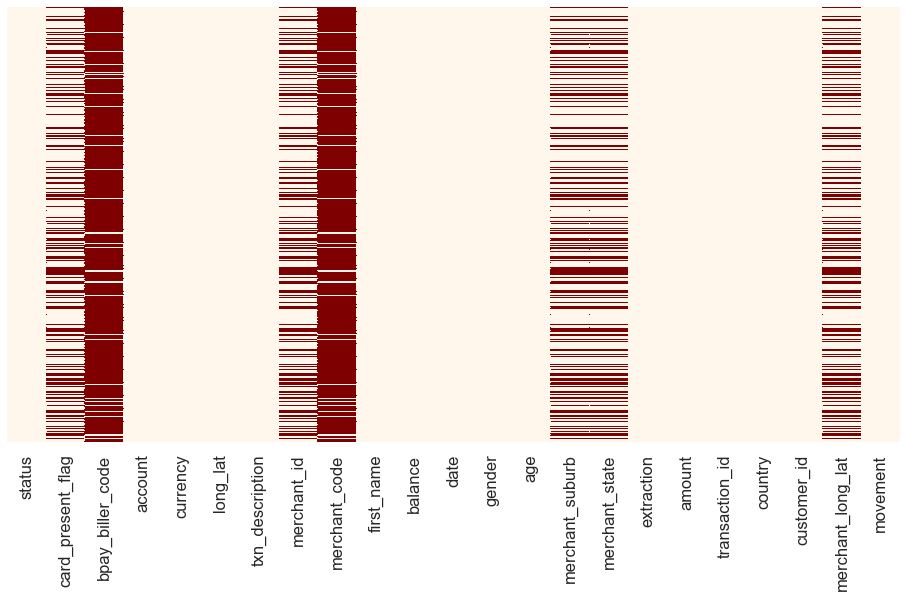

In [11]:
# Visualize the features with missing values
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'OrRd')

In [12]:
# Aggregate all the features that have missing values 
na_feature = [features for features in df.columns if df[features].isnull().sum() >= 1]
na_feature

['card_present_flag',
 'bpay_biller_code',
 'merchant_id',
 'merchant_code',
 'merchant_suburb',
 'merchant_state',
 'merchant_long_lat']

In [13]:
# Aggregate all the numerical features
num_feature = ['balance','date','age','amount', 'extraction'] 

df[num_feature].head()

balance       date  age  amount                    extraction
0    35.39 2018-08-01   26   16.25  2018-08-01T01:01:15.000+0000
1    21.20 2018-08-01   26   14.19  2018-08-01T01:13:45.000+0000
2     5.71 2018-08-01   38    6.42  2018-08-01T01:26:15.000+0000
3  2117.22 2018-08-01   40   40.90  2018-08-01T01:38:45.000+0000
4    17.95 2018-08-01   26    3.25  2018-08-01T01:51:15.000+0000

In [14]:
# Aggregate all the categorical features
cat_feature = [feature for feature in df.columns if feature not in num_feature]

df[cat_feature].head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name gender merchant_suburb merchant_state  \
0            NaN      Diana      F         Ashmore            QLD   
1            NaN      Diana      F          Sydney            NSW   
2            NaN    Michael      M          Sydney            NSW   
3            NaN     Rhonda      F         Buderim            QLD   
4            NaN      Diana      F   Mermaid Beach            QLD   

                     transaction_id    country     customer_id  \
0  a623070bfead4541a6b0fff8a09e706c  Australia  CUS-2487424745   
1  13270a2a902145da9db4c951e04b51b9  Australia  CUS-2487424745   
2  feb79e7ecd7048a5a36ec889d1a94270  Australia  CUS-2142601169   
3  2698170da3704fd981b15e64a006079e  Australia  CUS-1614226872   
4  329adf79878c4cf0aeb4188b4691c266  Australia  CUS-2487424745   

  merchant_long_lat movement  
0     153.38 -27.99    debit  
1     151.21 -33.87    debit  
2     151.21 -33.87    debit  
3     153.05 -26.68    debit  
4     153.44 -28.06    debit

## Check out the categorical variables

In [15]:
def plot_var(df, feature):
    plt.figure(figsize=(6,6))
    ax = sns.countplot(data = df, x = feature)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    plt.show()
    

In [16]:
df['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [17]:
df['merchant_id'].value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
99a705e7-d828-428a-89ce-3e24979369c5     1
be57cb22-32af-4722-988b-17380a235734     1
a4162475-f5dc-4715-ae7d-ee83f3d027f3     1
d066992c-cfaf-4c4a-8d76-42844a72e355     1
468874b6-36c3-4159-a16e-347654ab3553     1
Name: merchant_id, Length: 5725, dtype: int64

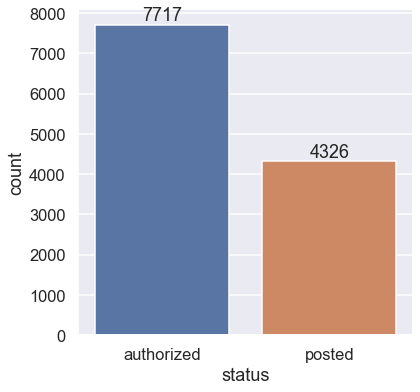

In [18]:
plot_var(df, 'status')

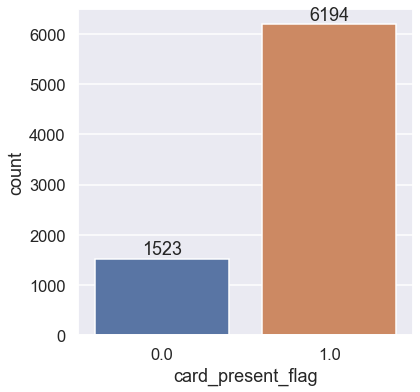

In [19]:
plot_var(df, 'card_present_flag')

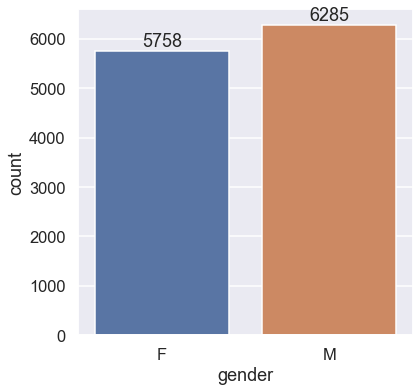

In [20]:
plot_var(df, 'gender')

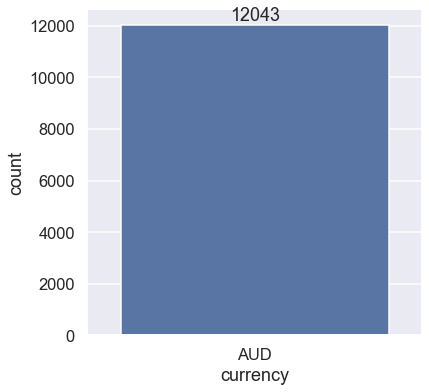

In [21]:
plot_var(df, 'currency')

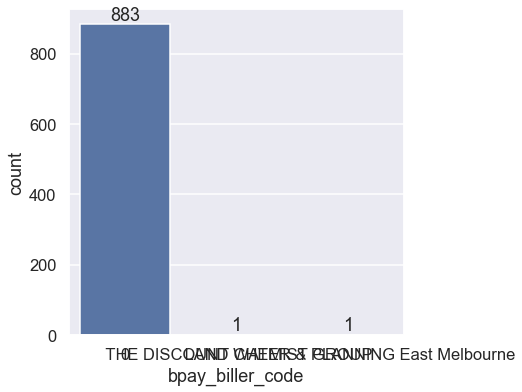

In [22]:
plot_var(df, 'bpay_biller_code')


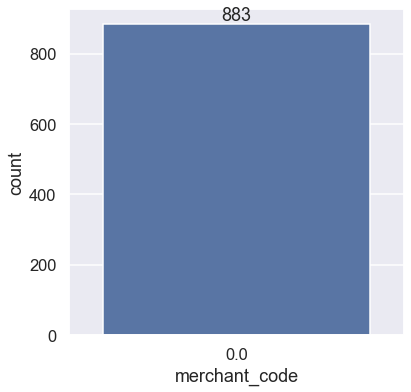

In [23]:
plot_var(df, 'merchant_code')

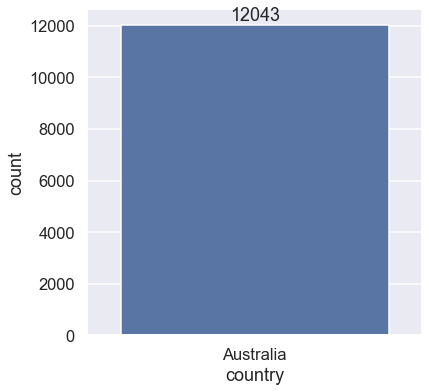

In [24]:
plot_var(df, 'country')

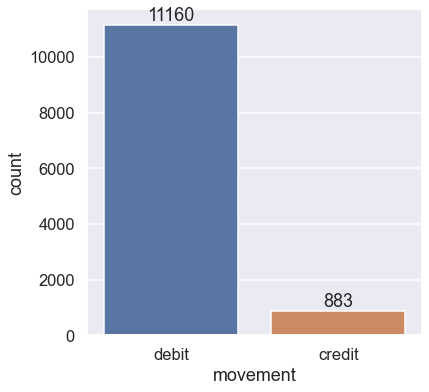

In [25]:
plot_var(df, 'movement')


In [26]:
# after grouping all the credit transactions we found they were all PAY/SALARY related
df.groupby('movement')['txn_description'].value_counts()

movement  txn_description
credit    PAY/SALARY          883
debit     SALES-POS          3934
          POS                3783
          PAYMENT            2600
          INTER BANK          742
          PHONE BANK          101
Name: txn_description, dtype: int64

In [27]:
# aggregate transactions by txn_desc and check their counts and average amounts respectively
df_trx = df.groupby('txn_description').agg({'transaction_id': 'size', 'amount': 'mean'})
df_trx.reset_index(inplace = True)
df_trx.sort_values('amount', ascending = False, inplace = True)

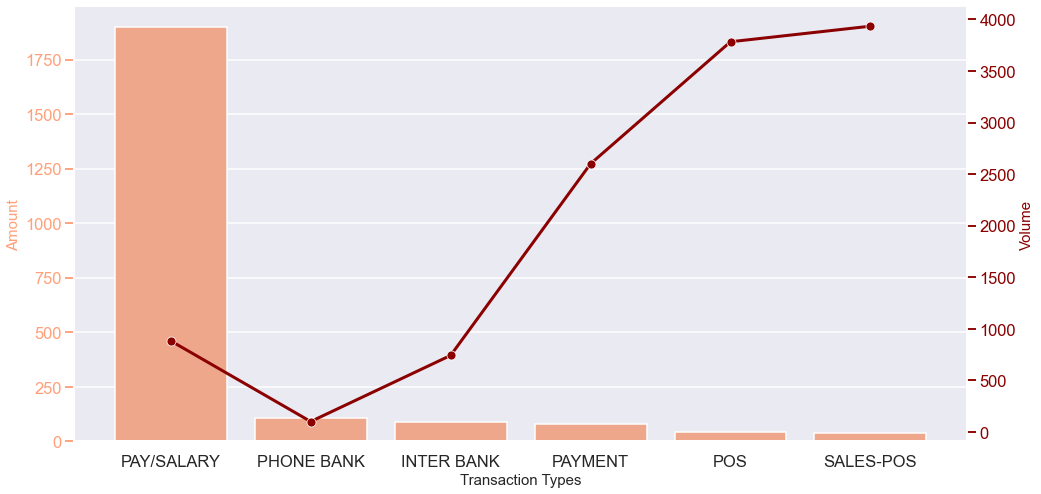

In [28]:
plt.figure(figsize=(16,8))
ax1 = sns.barplot(data= df_trx, 
                  x="txn_description", 
                  y = 'amount', 
                  ci = None, color = 'lightsalmon',
                  )

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_trx, 
                   x = 'txn_description', 
                   y = 'transaction_id',  
                   linewidth =3, 
                   marker = 'o',
                   color = 'darkred',
                   sort = False)
ax2.grid(None)
ax1.set_xlabel('Transaction Types', fontsize= 15)
ax1.set_ylabel('Amount', fontsize= 15, color = 'lightsalmon')
ax2.set_ylabel('Volume', fontsize= 15, color = 'darkred')
ax1.tick_params(axis = 'y', colors='lightsalmon')
ax2.tick_params(colors='darkred')


plt.show()

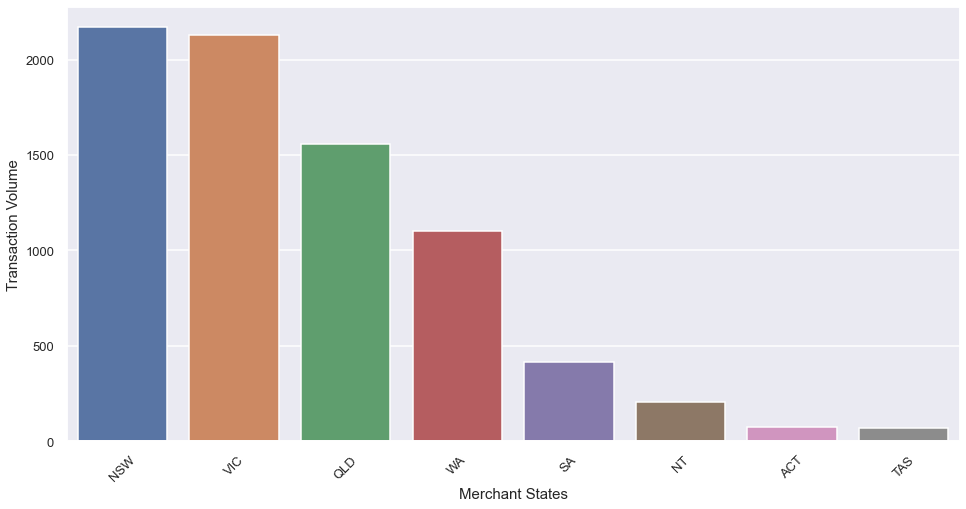

In [29]:
# check how transactions distributed among states
df_loc = df.groupby('merchant_state').agg({'transaction_id': 'size'}) # 'amount': 'mean'})
df_loc.reset_index(inplace = True)
df_loc.sort_values('transaction_id', ascending = False, inplace = True)

plt.figure(figsize=(16,8))
sns.barplot(data=df_loc, x = 'merchant_state', y ='transaction_id')
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Merchant States', fontsize=15)
plt.ylabel('Transaction Volume', fontsize=15)
plt.show()

In [37]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
from folium.plugins import HeatMap

In [31]:
start_coord = [-37.840935, 144.946457]
site_map = folium.Map(location=start_coord, zoom_start=10)

In [32]:
# group customers' locations and obtain the counts of each trx_desc
location_group = df.groupby('long_lat')['txn_description'].value_counts()
df_location_group = location_group.unstack()

In [33]:
df_location_group

txn_description  INTER BANK  PAY/SALARY  PAYMENT  PHONE BANK    POS  SALES-POS
long_lat                                                                      
114.62 -28.80           1.0        13.0     22.0         NaN   51.0       37.0
115.72 -32.28           6.0        13.0     39.0         NaN   26.0       26.0
115.74 -31.72           3.0        13.0     41.0         NaN   85.0       88.0
115.78 -31.90           NaN        14.0     24.0         NaN   44.0       33.0
115.79 -31.79          19.0        13.0     13.0         NaN   71.0       83.0
...                     ...         ...      ...         ...    ...        ...
153.10 -27.66           NaN        13.0     26.0         NaN  111.0      109.0
153.32 -27.93           3.0        13.0     29.0         NaN   93.0      101.0
153.41 -27.95          16.0        14.0     17.0         NaN  259.0      272.0
153.41 -28.01          40.0         7.0     31.0        12.0   30.0       25.0
255.00 -573.00          1.0         7.0     36.0         NaN   38.0       41.0

[100 rows x 6 columns]

In [34]:
df_location_group.reset_index(inplace = True)
df_location_group.head()

txn_description       long_lat  INTER BANK  PAY/SALARY  PAYMENT  PHONE BANK  \
0                114.62 -28.80         1.0        13.0     22.0         NaN   
1                115.72 -32.28         6.0        13.0     39.0         NaN   
2                115.74 -31.72         3.0        13.0     41.0         NaN   
3                115.78 -31.90         NaN        14.0     24.0         NaN   
4                115.79 -31.79        19.0        13.0     13.0         NaN   

txn_description   POS  SALES-POS  
0                51.0       37.0  
1                26.0       26.0  
2                85.0       88.0  
3                44.0       33.0  
4                71.0       83.0

In [35]:
df_location_group = df_location_group.fillna(0)
df_location_group.isnull().sum()

txn_description
long_lat      0
INTER BANK    0
PAY/SALARY    0
PAYMENT       0
PHONE BANK    0
POS           0
SALES-POS     0
dtype: int64

In [38]:
for index, i in df_location_group.iterrows():
    lat = str(i['long_lat']).split(' ')[1]
    lng = str(i['long_lat']).split(' ')[0]
    iframe = folium.IFrame('INTER BANK: %.2f' % (i['INTER BANK']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()) +'<br>'+ 
                             'PAY/SALARY: %.2f' % (i['PAY/SALARY']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()) +'<br>'+ 
                            'PAYMENT: %.2f' % (i['PAYMENT']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()) +'<br>'+ 
                            'PHONE BANK: %.2f' % (i['PHONE BANK']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()) +'<br>'+ 
                            'POS: %.2f' % (i['POS']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()) +'<br>'+ 
                            'SALES-POS: %.2f' % (i['SALES-POS']/i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()))
    circle = folium.Circle(
    [lat,lng], 
    radius=20*(i[['INTER BANK','PAY/SALARY','PAYMENT','PHONE BANK','POS','SALES-POS']].sum()), 
    color='#d35400', 
    fill=False,
    ).add_child(folium.Popup(iframe,parse_html=True, min_width=200,max_width=250))
    site_map.add_child(circle)

heat_data = [[i['long_lat'].split(' ')[1] , i['long_lat'].split(' ')[0]] for index, i in df.iterrows()]
HeatMap(heat_data).add_to(site_map)  
site_map


## Check out the numerical features and combine into a list 

In [39]:
df[num_feature].head()

balance       date  age  amount                    extraction
0    35.39 2018-08-01   26   16.25  2018-08-01T01:01:15.000+0000
1    21.20 2018-08-01   26   14.19  2018-08-01T01:13:45.000+0000
2     5.71 2018-08-01   38    6.42  2018-08-01T01:26:15.000+0000
3  2117.22 2018-08-01   40   40.90  2018-08-01T01:38:45.000+0000
4    17.95 2018-08-01   26    3.25  2018-08-01T01:51:15.000+0000

In [40]:
# check out the correlation among 'balance', 'age', 'amount'
# we will leave the 'extraction' for later analysis
df[[num_feature for num_feature in df.columns if num_feature not in ['extraction', 'card_present_flag', 'merchant_code']]].corr()


balance       age    amount
balance  1.000000  0.199329  0.059178
age      0.199329  1.000000  0.029980
amount   0.059178  0.029980  1.000000

In [41]:
# take a look at discrete variables

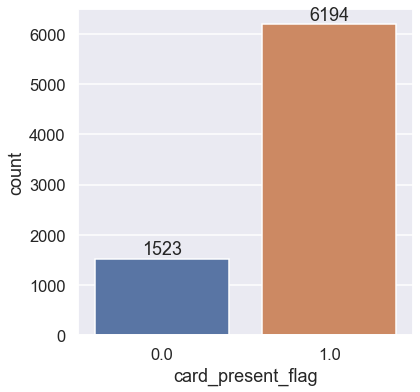

In [42]:
# examine the 'card_present_flag' and its relationship with 'txn_description'
plot_var(df, 'card_present_flag')

In [43]:
# group the transactions based on card presence and obtain the counts of each txn_desc
df_with_card = df[df['card_present_flag'] == 1].groupby('txn_description').size().reset_index(name='count')
df_without_card = df[df['card_present_flag'] == 0].groupby('txn_description').size().reset_index(name='count')

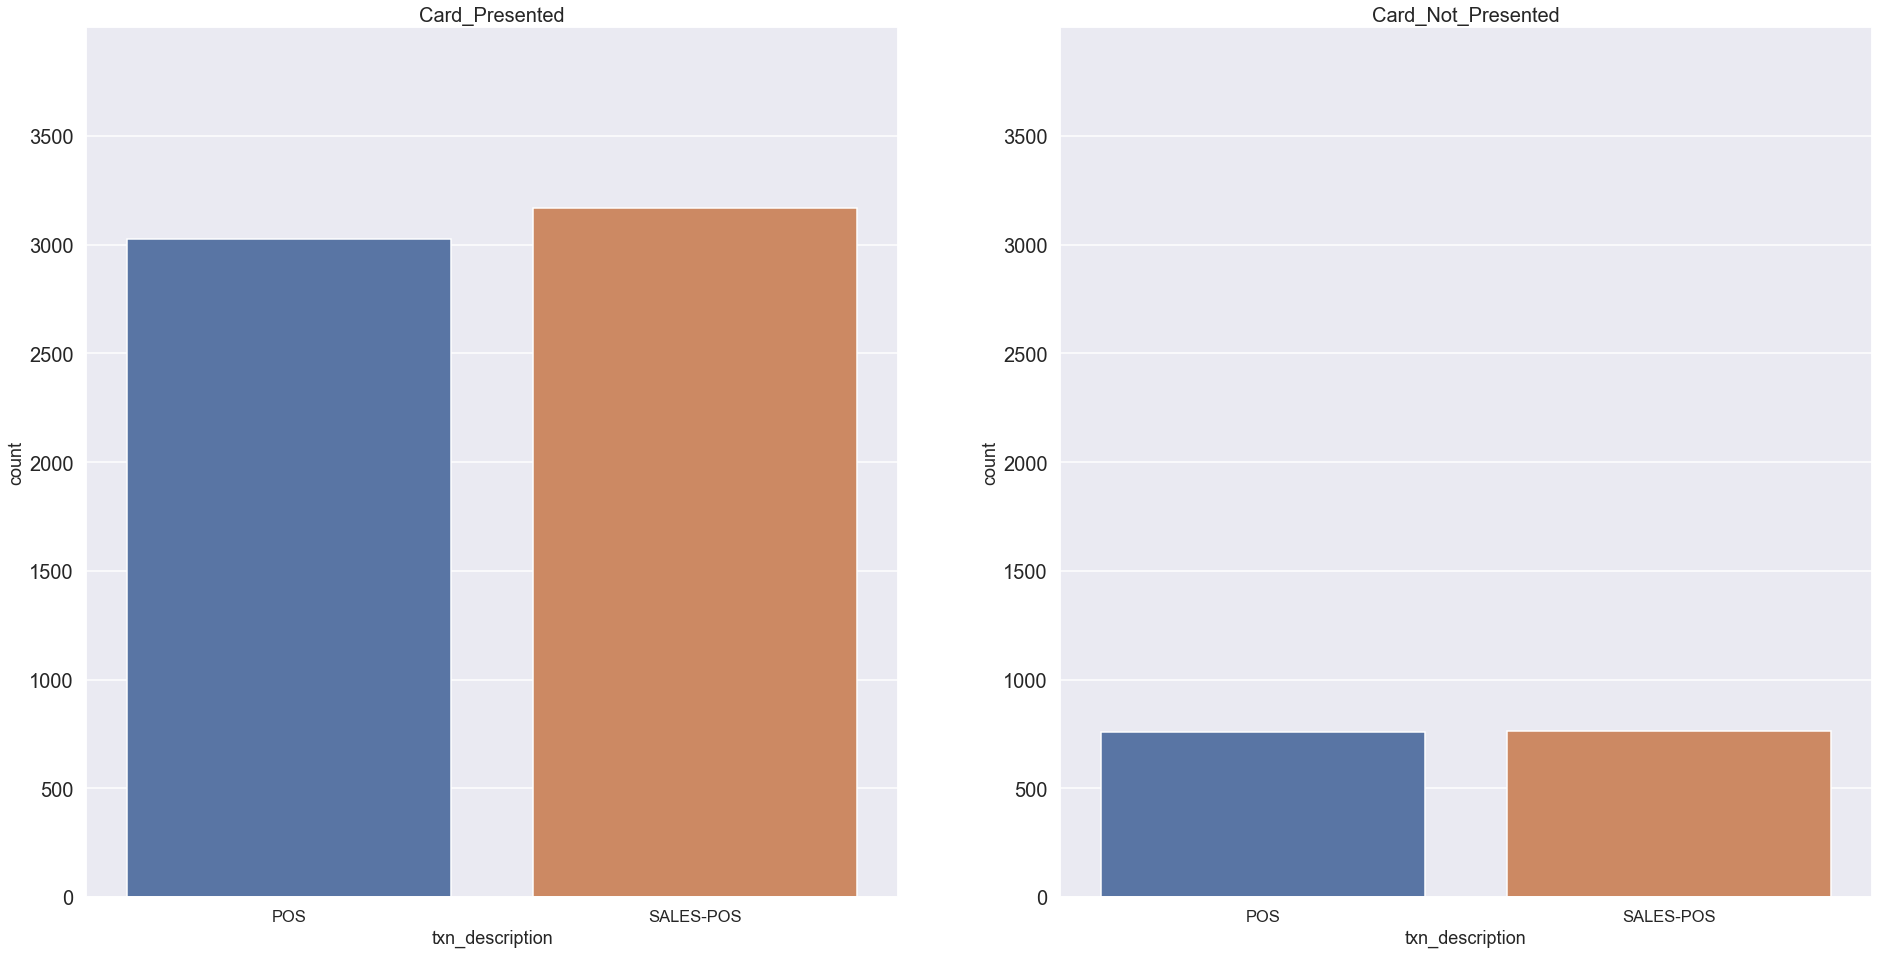

In [44]:
# plot the counts
fig, axes = plt.subplots(1, 2,  figsize=(32,16))
axes[0].set_title('Card_Presented', size = 20)
axes[1].set_title('Card_Not_Presented', size = 20)
sns.barplot(data = df_with_card, 
                   x = 'txn_description', 
                   y = 'count', 
                   ax = axes[0],)
sns.barplot(data = df_without_card, 
                   x = 'txn_description', 
                   y = 'count', 
                   ax = axes[1],
                   )
axes[0].set_yticks(np.arange(0, 4000, 500))
axes[0].set_yticklabels(np.arange(0, 4000, 500), fontsize = 20)
axes[0].set_ylim(0, 4000)
axes[1].set_yticks(np.arange(0, 4000, 500))
axes[1].set_yticklabels(np.arange(0, 4000, 500), fontsize = 20)
axes[1].set_ylim(0, 4000)

plt.show()

In [45]:
# for trx that has no indicator whether card presented or not, we analyse their txn_desc distribution
print('Other transactions volumes '+ '\n' + str(df[~df['card_present_flag'].isin([0,1])].groupby('txn_description').size()))

Other transactions volumes 
txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
dtype: int64


In [46]:
# From above we can see that NaN in 'card_present_flag' represents non-POS transactions
# here we replace NaN with 'NON_POS' for convenience of further anslysis; and also we replace 0 and 1 with 'Card_Not_Pres' and 'Card_Pres'
df['card_present_flag'].fillna('NON_POS', inplace = True)
df.loc[df['card_present_flag']==1,'card_present_flag'] = 'Card_Pres'
df.loc[df['card_present_flag']==0,'card_present_flag'] = 'Card_Not_Pres'
df['card_present_flag'].value_counts()

Card_Pres        6194
NON_POS          4326
Card_Not_Pres    1523
Name: card_present_flag, dtype: int64

In [47]:
# Visualize the relationships between 'card_present_flag' and 'txn_description'

fig_card = px.sunburst(
    df, path=['card_present_flag','txn_description'], 
    color = 'txn_description',
    color_continuous_scale='RdBu'
)

fig_card.show()

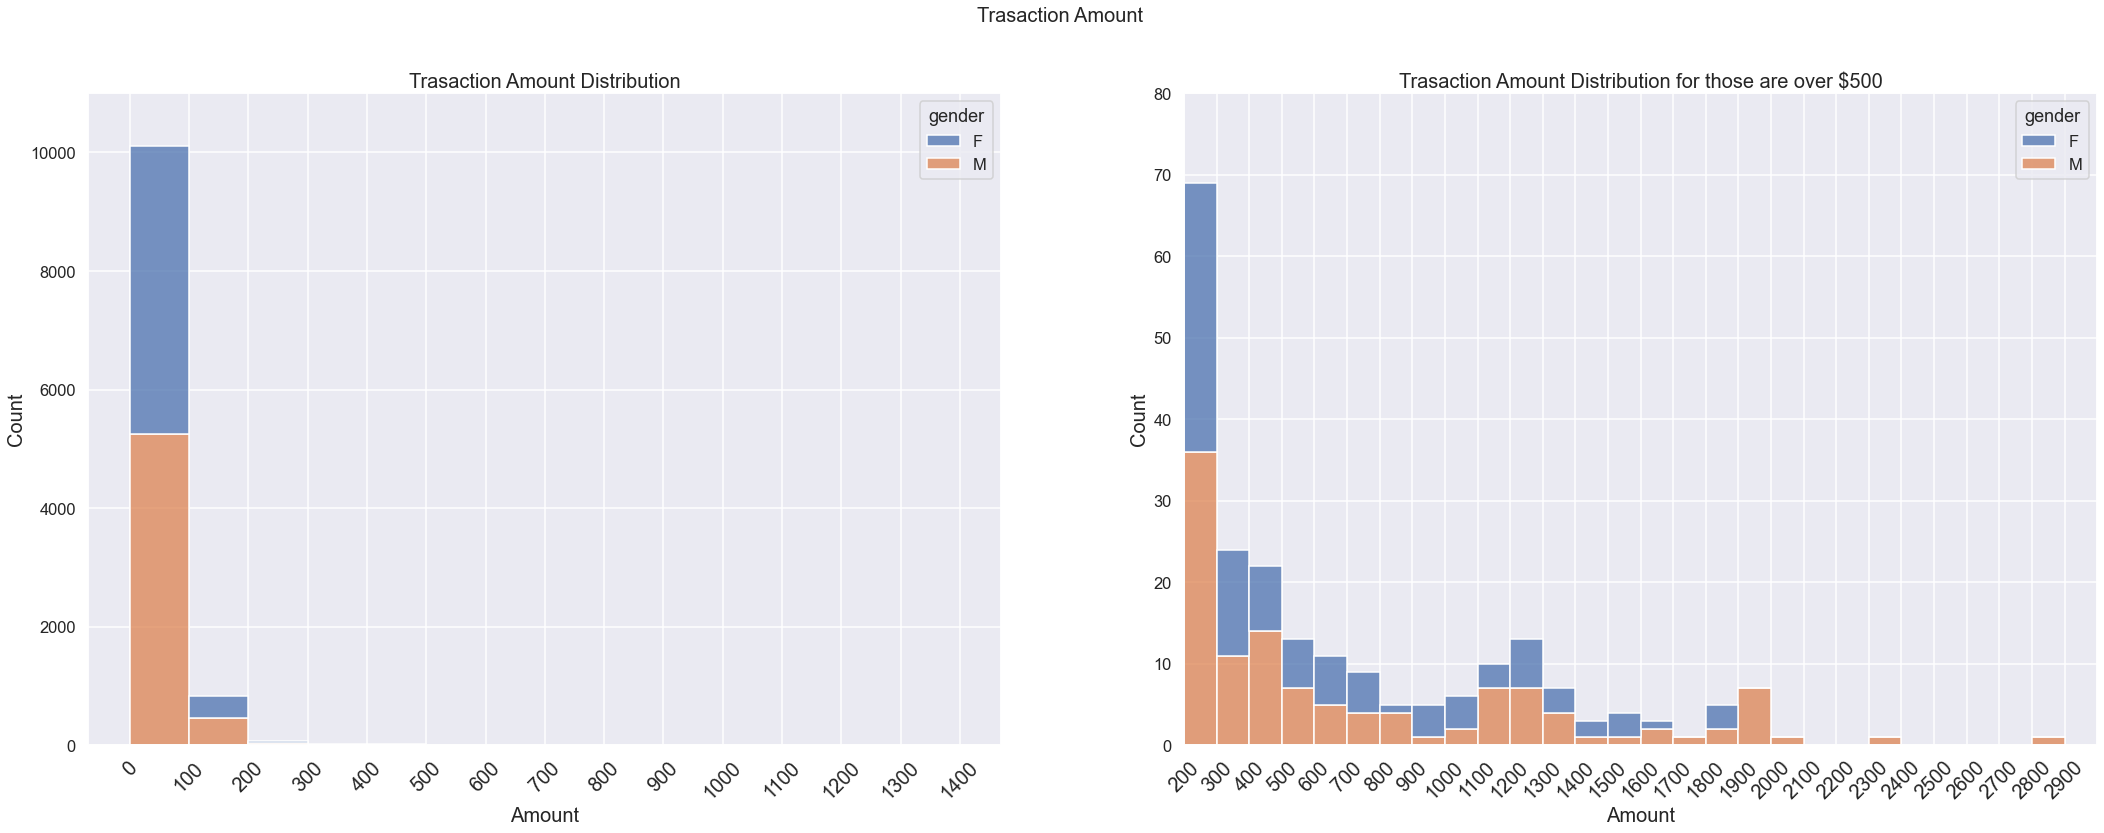

In [48]:
# check on the distribution of transaction amount and discover its relationship with genders
# since the data is very biased, in the 2nd subplot we will zoom in to have a clearer look at those transactions with amount over $500

fig, axes = plt.subplots(1, 2,  figsize=(36,12))
fig.suptitle('Trasaction Amount', size = 20)
axes[0].set_title('Trasaction Amount Distribution', size = 20)
axes[1].set_title('Trasaction Amount Distribution for those are over $500', size = 20)


sns.histplot(ax = axes[0], 
             data=df.loc[df['txn_description'] != 'PAY/SALARY'], 
             bins= np.arange(0, 1500, 100), 
             x="amount", 
             hue = 'gender', 
             hue_order = ['F','M'], 
             multiple="stack")

sns.histplot(ax = axes[1], 
             data=df.loc[df['txn_description'] != 'PAY/SALARY'], 
             bins= np.arange(0, 3000, 100), 
             x="amount", 
             hue = 'gender', 
             hue_order = ['F','M'], 
             multiple="stack")

axes[0].set_xticks(np.arange(0, 1500, 100))
axes[0].set_xticklabels(np.arange(0, 1500, 100), rotation= 45, fontsize = 20)
axes[0].set_ylim(0, 11000)
axes[0].set_xlabel('Amount', fontsize= 20)
axes[0].set_ylabel('Count', fontsize= 20)
axes[1].set_xticks(np.arange(0, 3000, 100))
axes[1].set_xticklabels(np.arange(0, 3000, 100), rotation= 45, fontsize = 20)
axes[1].set_xlim((200,3000))
axes[1].set_ylim((0,80))
axes[1].set_xlabel('Amount', fontsize= 20)
axes[1].set_ylabel('Count', fontsize= 20)

plt.show()

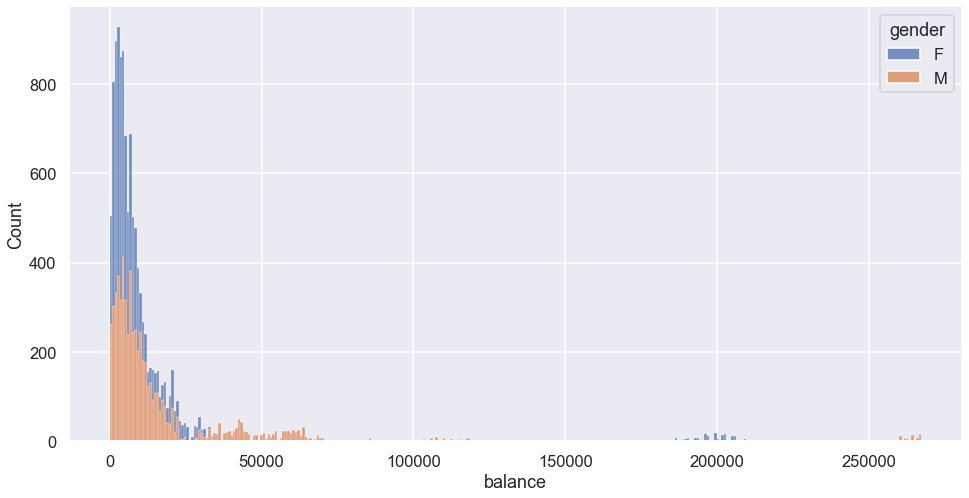

In [49]:
# We then explore the balances and found it follows a highly right skewed distribution
plt.figure(figsize =(16, 8))
sns.histplot(data=df, 
            x = 'balance', 
            hue = 'gender',
            multiple="stack"
            )
plt.show()

In [50]:
# take a look at the range of the date of transactions
print('Transactions were dated from ' + str(min(df['date'])) + ' to ' + str(max(df['date'])))

Transactions were dated from 2018-08-01 00:00:00 to 2018-10-31 00:00:00


In [51]:
# then we try to split and extract info from 'extraction'
# the format of 'extraction' is as '2018-08-01T01:01:15.000+0000'
# first we split the sequence on 'T', the 1st part will be the date while the 2nd half contains the specific time
ext_date = df['extraction'].apply(lambda x: x.split('T')[0])
# for the 2nd half, we split it again on '.' and only adopt the 1st half of it, which is the time
ext_time = df['extraction'].apply(lambda x: x.split('T')[1].split('.')[0])


In [52]:
# ext_date = ext_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
# ext_time = ext_time.apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())

In [53]:
# convert the date and time to datetime format
ext_date = pd.to_datetime(ext_date.astype(str))
ext_time = pd.to_datetime(ext_time.astype(str))

In [54]:
# extract day, hour, and minute respectively
# as our data only covers 3 months period, so taking year, month into consideration doesnt really make sense
df['extract_month'] = ext_date.dt.month
df['extract_day'] = ext_date.dt.day
df['extract_hour'] = ext_time.dt.hour
df['extract_minute'] = ext_time.dt.minute
df['extract_second'] = ext_time.dt.second

In [55]:
# there is no detailed explaination to the relationship between 'date' and 'extraction', we try to calculate the 
# difference between them and found they are actually the same. So we can choose to keep only either one
time_dif = ext_date - df['date']
time_dif.value_counts()

0 days    12043
dtype: int64

In [56]:
# remove 'date' and 'extraction' and only keep the 'extract_day', 'extract_hour', 'extract_minute' we derived above
# df.drop(['date','extraction'], axis = 1, inplace = True)

In [57]:
# then we try to discover the trends of debit transaction volumes and average amounts based on the date of the month
df_by_day = df.groupby(['extract_month','extract_day','movement']).agg({'transaction_id': 'size', 'amount': 'mean'})
df_by_day.reset_index(inplace = True)
df_by_day.head()

extract_month  extract_day movement  transaction_id       amount
0              8            1   credit              13  1870.884615
1              8            1    debit             124    44.729355
2              8            2   credit              10  1422.823000
3              8            2    debit             142    53.225986
4              8            3   credit              15  2004.045333

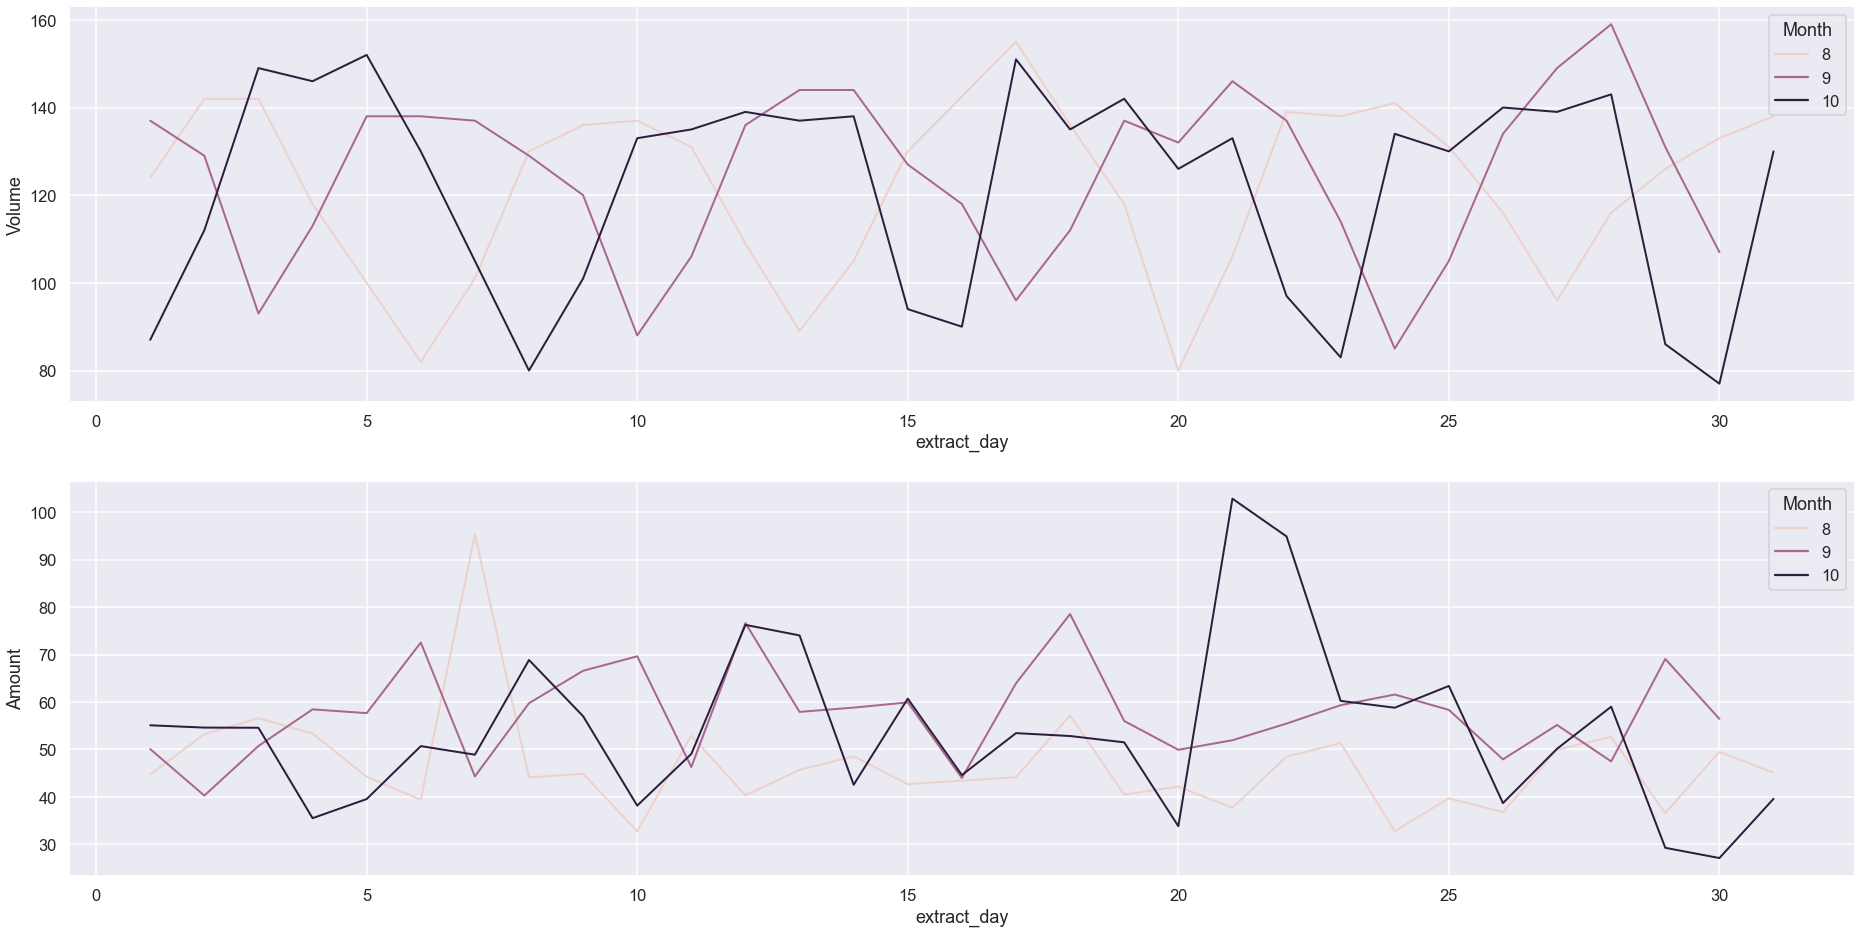

In [58]:
fig, axes = plt.subplots(2, 1,  figsize=(32,16))


sns.lineplot(ax = axes[0], 
                   data=df_by_day[df_by_day['movement'] == 'debit'], 
                   x = 'extract_day', 
                   y = 'transaction_id', 
                   hue = 'extract_month', 
                   linewidth =2, 
                   )

sns.lineplot(ax = axes[1], 
                   data=df_by_day[df_by_day['movement'] == 'debit'], 
                   x = 'extract_day', 
                   y = 'amount', 
                   hue = 'extract_month', 
                   linewidth =2, 
                   )

axes[0].set_ylabel('Volume', fontsize= 18)
axes[1].set_ylabel('Amount', fontsize= 18)
axes[0].legend(title='Month', loc=1)
axes[1].legend(title='Month', loc=1)

plt.show()


* We can see some patterns from the volume change in a month and seems like its weekly based. However, from the plot of average amount, its hard to tell any obvious pattern there. 

In [59]:
# Then we will try to bin the dataset based on the weekdays that the transactions fell onto to see further pattern

In [60]:
# Create a 'weekday' column specify which day in a week that the transaction fell onto
df['weekday'] = df['date'].dt.day_name()

# create a categorical type to set the order of the weekdays
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekday'] = df['weekday'].astype(cat_type)

In [61]:
# Then we try to aggregate trx volume and avg amount by weekdays and movements
df_weekday = df.groupby(['weekday','movement']).agg({'transaction_id': 'size', 'amount': 'mean'})
df_weekday.reset_index(inplace = True)
df_weekday.head()

weekday movement  transaction_id       amount
0     Monday   credit             207  2136.075604
1     Monday    debit            1153    56.732793
2    Tuesday   credit             160  1595.270813
3    Tuesday    debit            1327    55.946390
4  Wednesday   credit             172  1789.362093

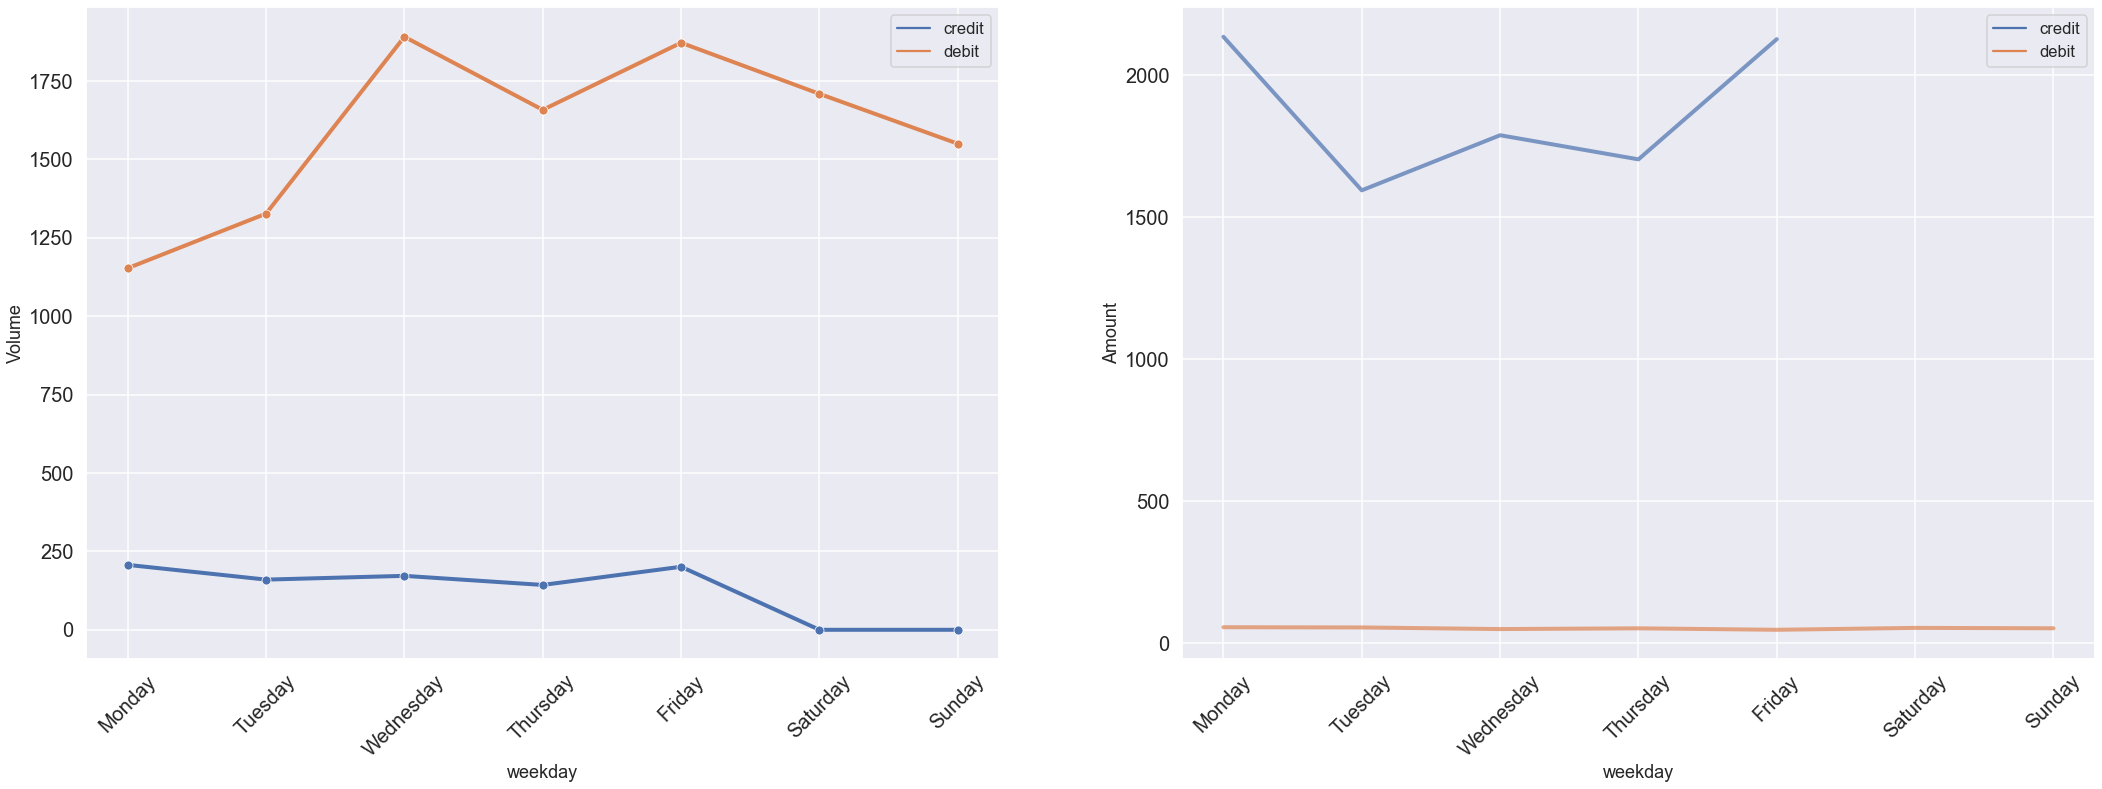

In [62]:
fig, axes = plt.subplots(1, 2,  figsize=(36, 12))

ax1 = sns.lineplot(ax = axes[0], data=df_weekday, 
                   x = 'weekday', 
                   y = 'transaction_id', 
                   hue = 'movement', 
                   linewidth =4, 
                   marker = 'o')

ax2 = sns.lineplot(ax = axes[1], data= df_weekday, 
                  x= "weekday", 
                  y = 'amount', 
                  hue = 'movement',
                  linewidth =4,
                  alpha = 0.7)

ax1.set_ylabel('Volume')
ax2.set_ylabel('Amount')
ax1.tick_params(axis = 'x',labelsize=20, rotation= 45)
ax2.tick_params(axis = 'x',labelsize=20, rotation= 45)
ax1.tick_params(axis = 'y',labelsize=20)
ax2.tick_params(axis = 'y',labelsize=20)
ax1.legend(loc=1)
ax2.legend(loc=1)
plt.show()

* Here from the plot of volume to weekdays, we can see transaction volume tends to go up significantly from Wed to Fri, and it drops mildly after Fri till it meets a steep fall during Mon and Tues. This trend confirms the hypothesis from the previous plot.

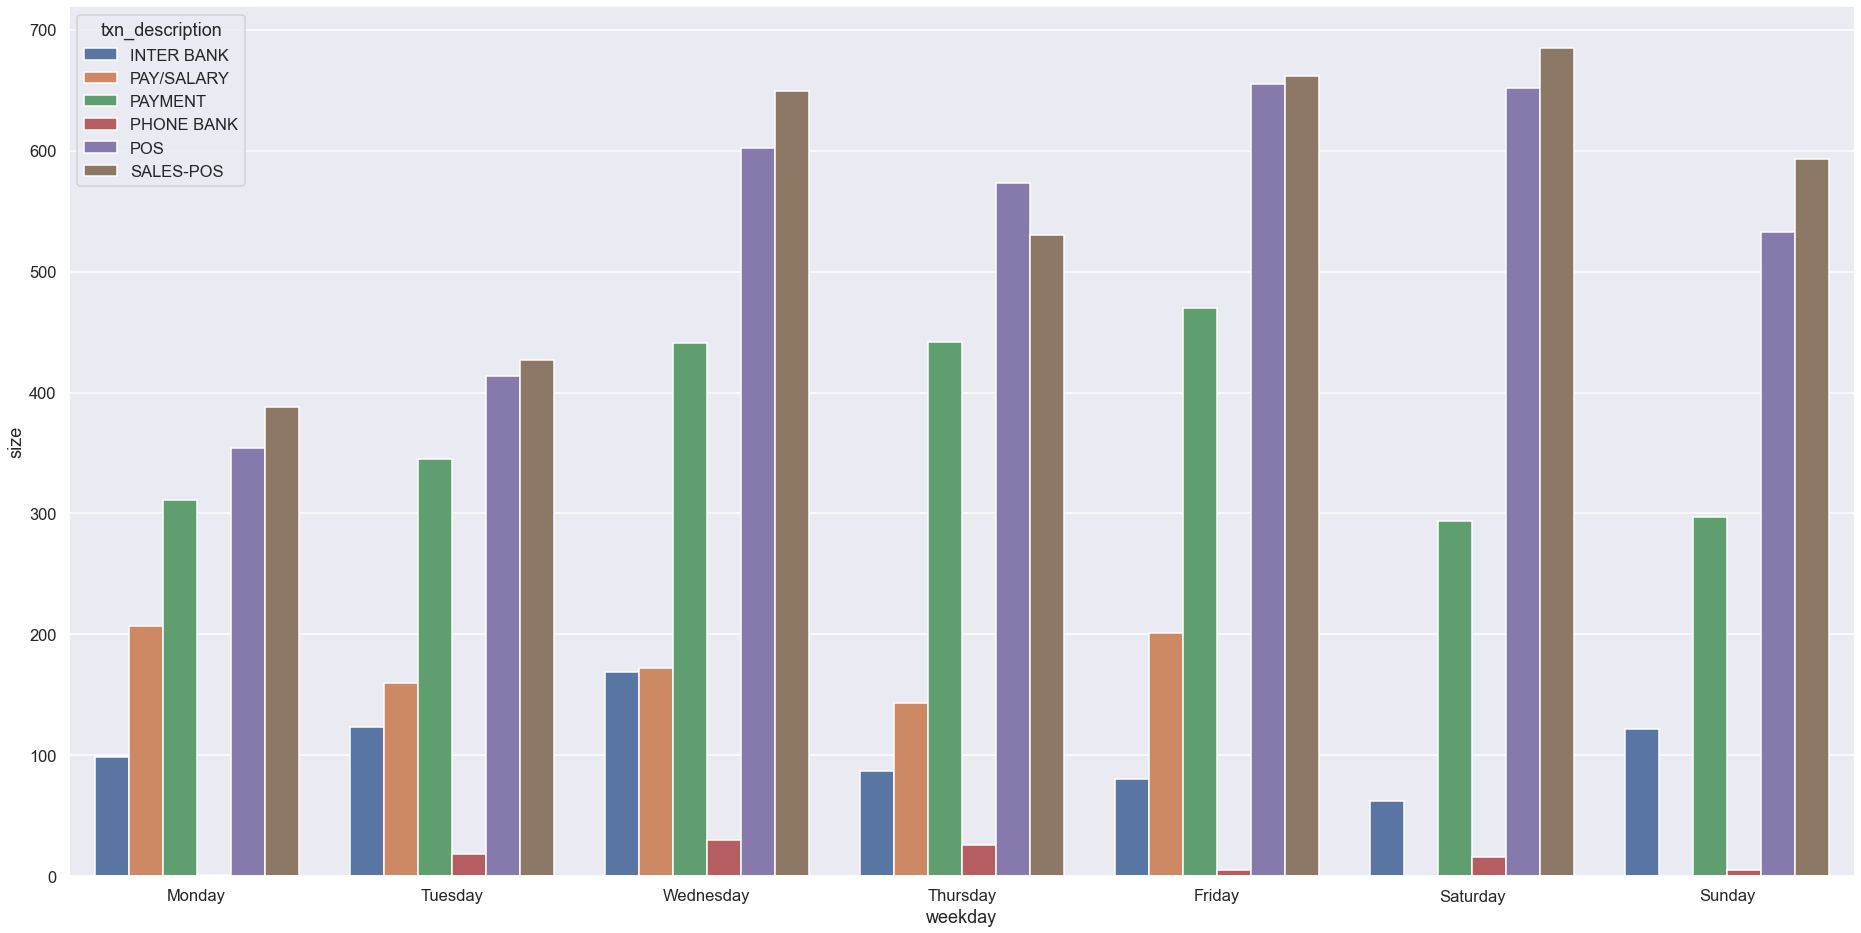

In [63]:
# We try to discover if there is any pattern among weekdays and txn_desc
# From which the bank may be able to adjust the resources allocated to different departments accroding based on weekdays

df_weekday_desc = df.groupby(['weekday','txn_description'], as_index = False)['transaction_id'].size()

plt.figure(figsize =(32, 16))
sns.barplot(data = df_weekday_desc, 
                  x= "weekday", 
                  y = 'size', 
                  hue = 'txn_description', 
                  ci=None, 
                  )
plt.show()

In [64]:
# group the transactions and their avg amounts based on 'weekday','extract_hour', 'movement'
df_hour = df.groupby(['weekday','extract_hour', 'movement'], as_index = False)['transaction_id'].size()
df_hour.head()

weekday  extract_hour movement  size
0  Monday             0   credit     0
1  Monday             0    debit     9
2  Monday             1   credit     0
3  Monday             1    debit    17
4  Monday             2   credit     0

In [65]:
# Then we try to see the trends of transaction volumes by hours on weekdays and weekends respectively
df_hour_weekday = df_hour[~df_hour['weekday'].isin(['Saturday', 'Sunday'])]
df_hour_weekend = df_hour[df_hour['weekday'].isin(['Saturday', 'Sunday'])]

<ipython-input-66-567246907530>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



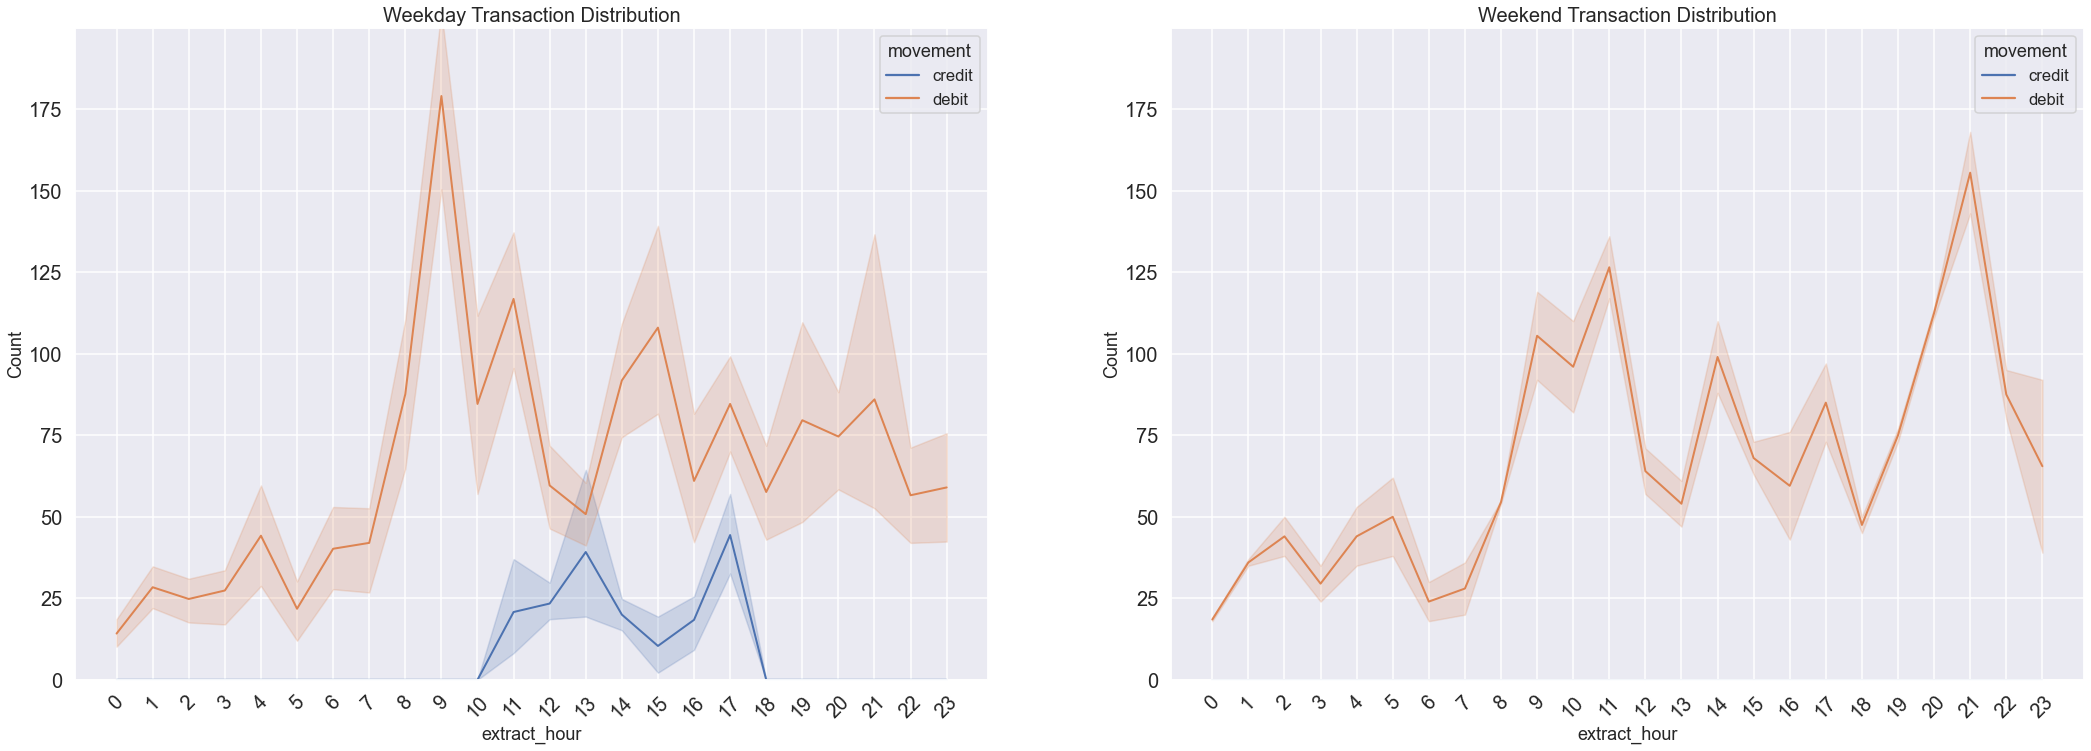

In [66]:
fig, axes = plt.subplots(1, 2,  figsize = (36,12))
axes[0].set_title('Weekday Transaction Distribution', size = 20)
axes[1].set_title('Weekend Transaction Distribution', size = 20)
sns.lineplot(ax = axes[0],
                   data = df_hour_weekday, 
                   x = 'extract_hour', 
                   y = 'size', 
                   hue = 'movement', 
                   linewidth =2, 
                   )

sns.lineplot(ax = axes[1],
                   data = df_hour_weekend, 
                   x = 'extract_hour', 
                   y = 'size', 
                   hue = 'movement', 
                   linewidth =2, 
                   )
for ax in axes:
    ax.set_xticks(np.arange(0, 24, 1))
    ax.set_xticklabels(np.arange(0, 24, 1), rotation= 45, fontsize = 20)    
    ax.set_ylim(0,200)
    ax.set_ylabel('Count')
    ax.set_yticklabels(np.arange(0, 200, 25), fontsize = 20)

plt.show()

In [67]:
# Here we try to calculate each customer's annual salary
# First we group them by each customer number, and we count their salary payments times in the 3 months period
df_salary = df.loc[df['txn_description'] == 'PAY/SALARY', ['age','gender','amount', 'transaction_id','customer_id']]
df_salary_grouped = df_salary.groupby(['customer_id','age','gender']).agg({'transaction_id': 'size', 'amount': 'mean'}).reset_index()

In [68]:
df_salary_grouped.head()

customer_id  age gender  transaction_id   amount
0  CUS-1005756958   53      F              13   970.47
1  CUS-1117979751   21      M               7  3578.65
2  CUS-1140341822   28      M               6  1916.51
3  CUS-1147642491   34      F              13  1711.39
4  CUS-1196156254   34      F               7  3903.73

In [69]:
# Here we can see different salary payment cycles in days and their counts respectively
df_salary_grouped['transaction_id'].value_counts()

6     28
13    27
7     24
14     8
12     5
2      4
4      2
5      1
3      1
Name: transaction_id, dtype: int64

In [70]:
# we calculate the timedelta in days for the 3 months period
days = max(df['date']) - min(df['date'])
days

Timedelta('91 days 00:00:00')

In [71]:
# we derive the annual salary figure for each customer and store them in a column named 'salary_annual'
df_salary_grouped['salary_annual'] = 365/ (91 / df_salary_grouped['transaction_id']) * df_salary_grouped['amount']

In [72]:
df_salary_grouped.head()

customer_id  age gender  transaction_id   amount  salary_annual
0  CUS-1005756958   53      F              13   970.47   50603.078571
1  CUS-1117979751   21      M               7  3578.65  100477.480769
2  CUS-1140341822   28      M               6  1916.51   46122.603297
3  CUS-1147642491   34      F              13  1711.39   89236.764286
4  CUS-1196156254   34      F               7  3903.73  109604.726923

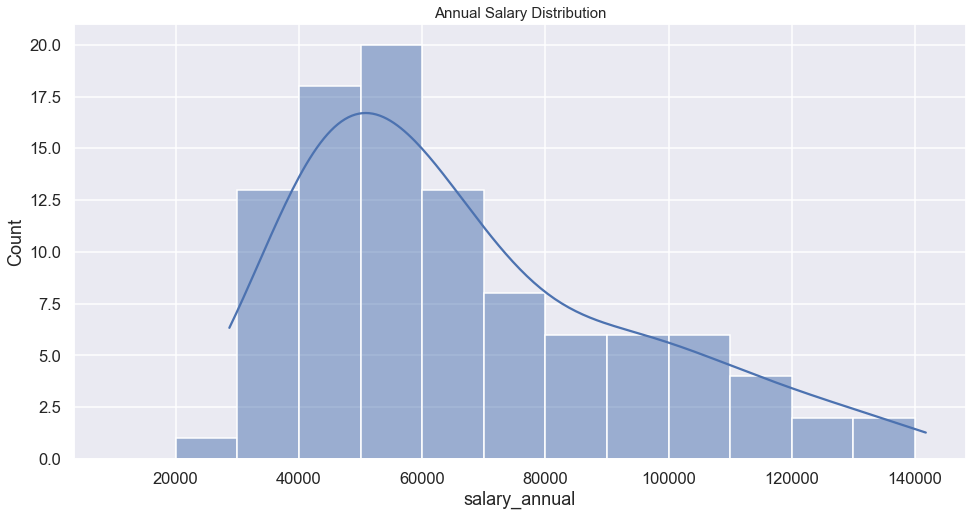

In [129]:
plt.figure(figsize=(16,8))
plt.title('Annual Salary Distribution', fontsize=15)

sns.histplot(data=df_salary_grouped, bins = np.arange(10000, 150000, 10000), x="salary_annual", kde=True)

plt.show()

Age ranges from 18-78


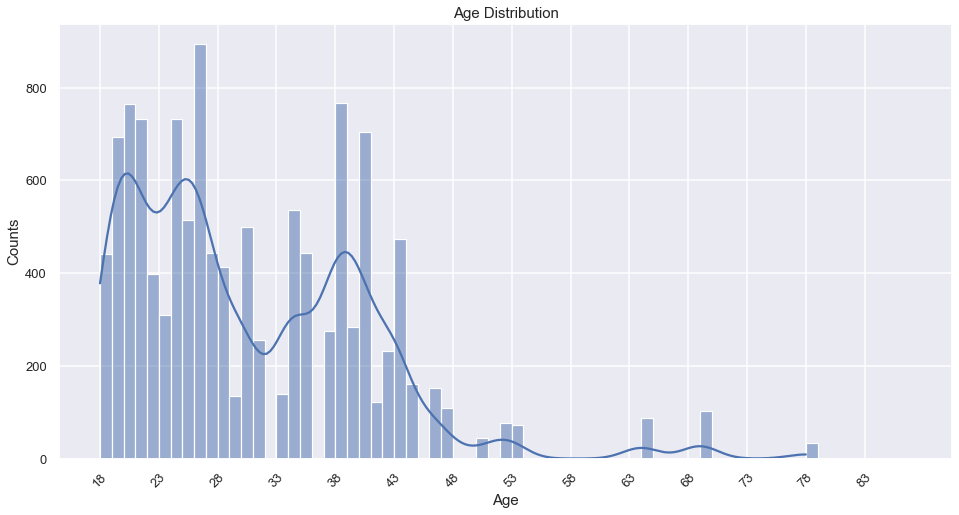

In [73]:
# check on the distribution of age

plt.figure(figsize=(16,8))
plt.title('Age Distribution', fontsize=15)

sns.histplot(data=df, bins = np.arange(18, 88, 1), x="age", kde=True)

print('Age ranges from ' + str(df['age'].min()) + '-' + str(df['age'].max()))

plt.xticks(np.arange(18, 88, 5), rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Counts', fontsize=15)

plt.show()

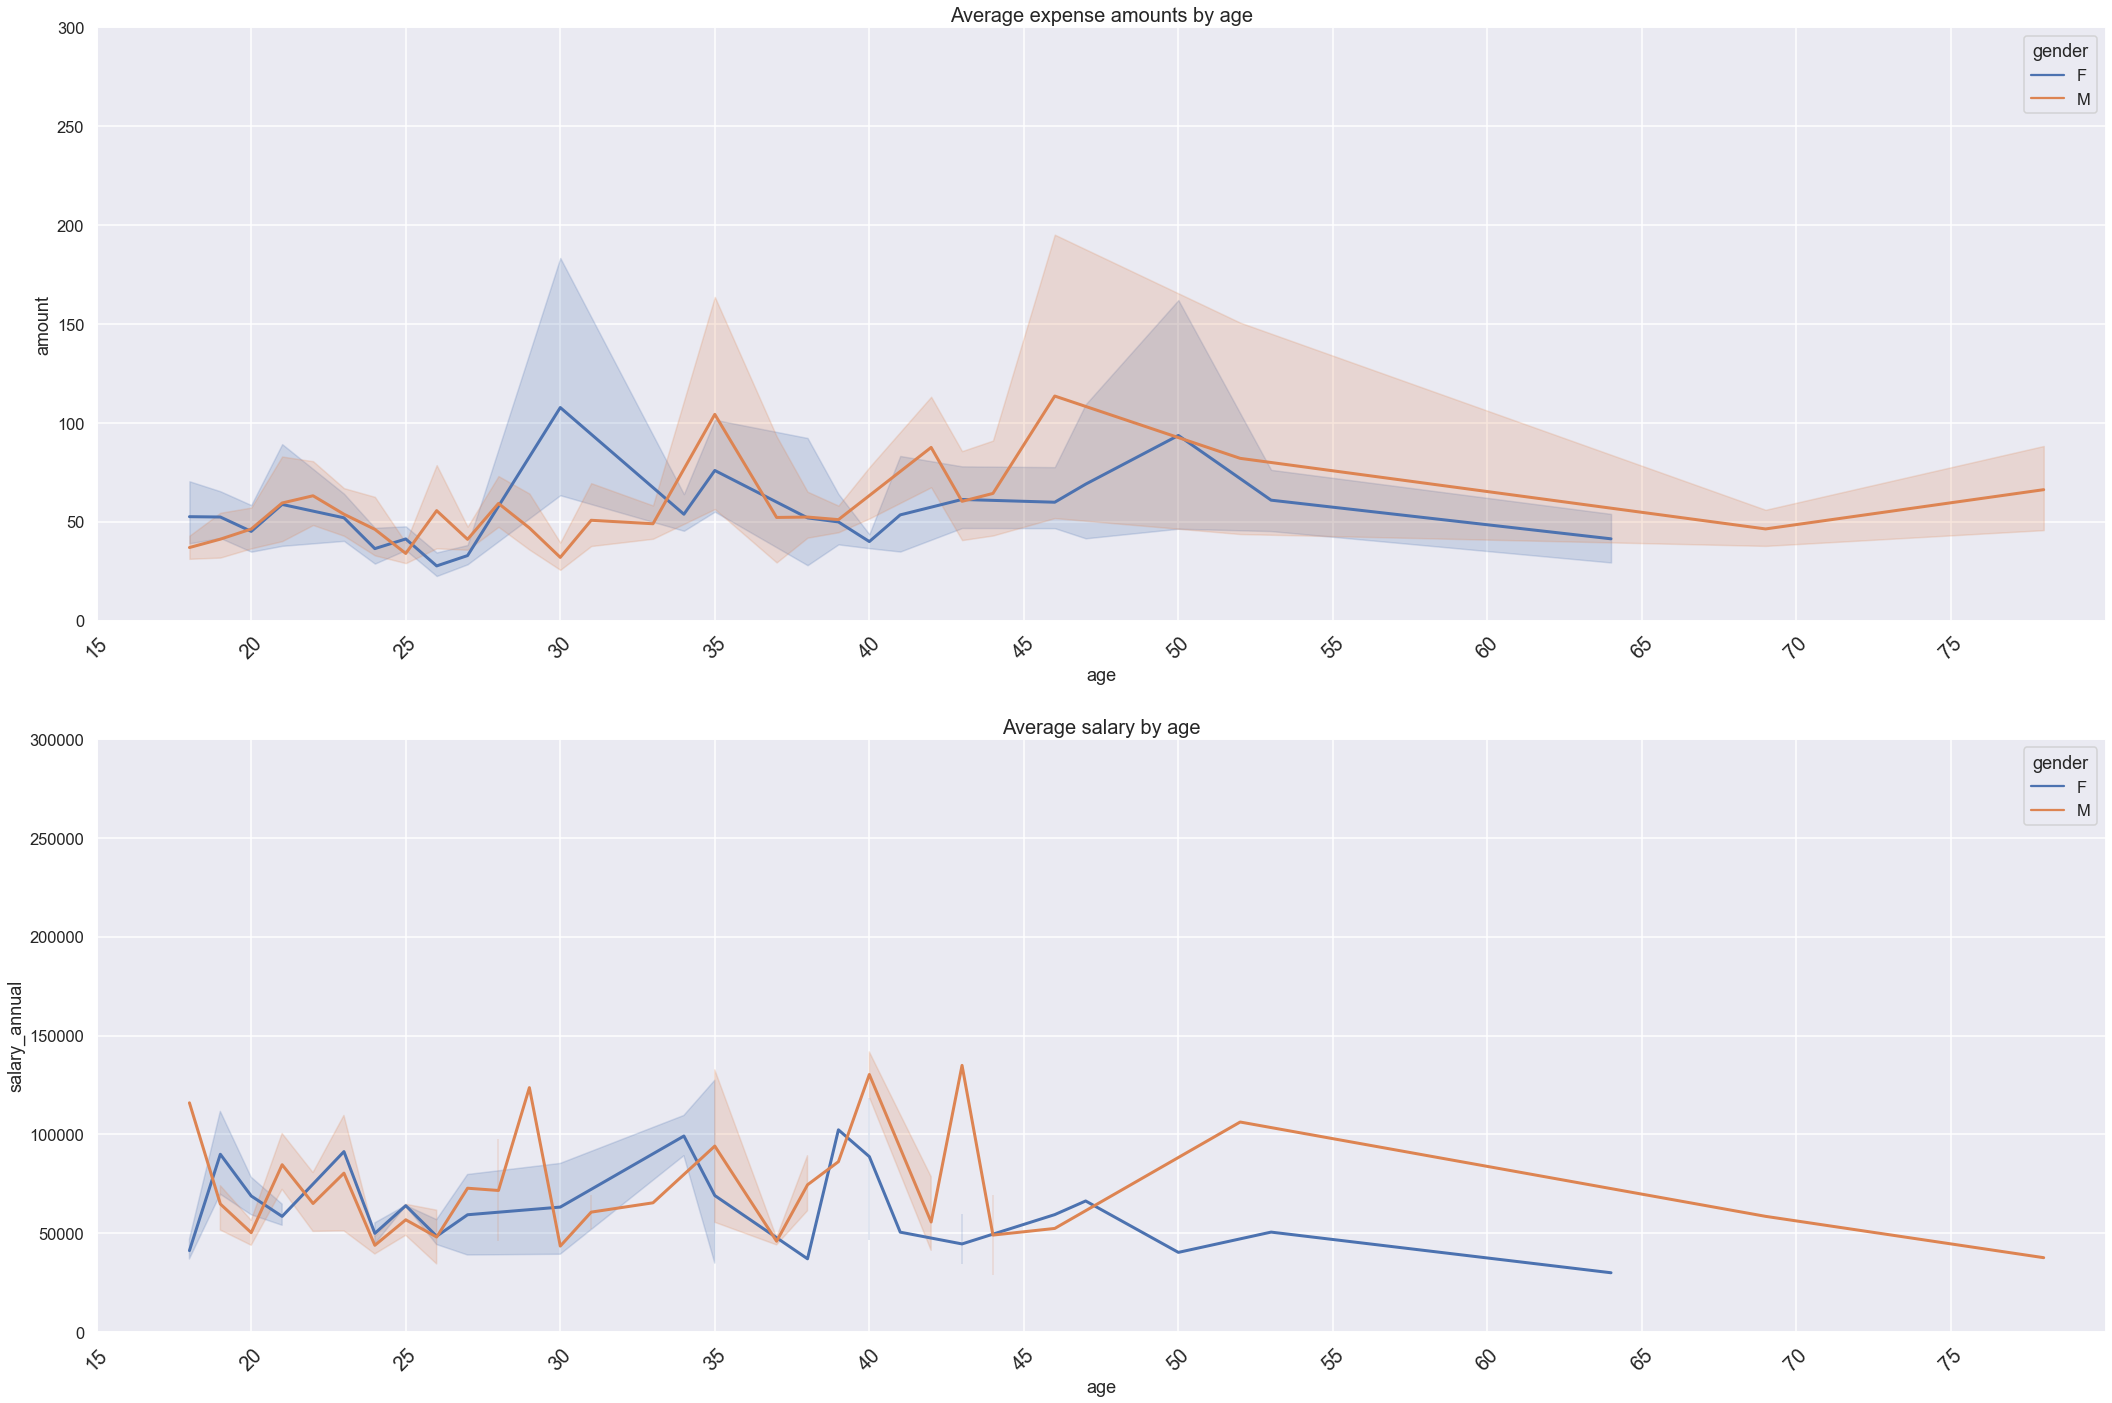

In [74]:
df_exp_age = df.loc[df['txn_description'] != 'PAY/SALARY', ['age','gender','amount']]



fig, axes = plt.subplots(2, 1,  figsize=(36,24))
axes[0].set_title('Average expense amounts by age', size = 20)
axes[1].set_title('Average salary by age', size = 20)
sns.lineplot(ax = axes[0],
                   data= df_exp_age, 
                   x="age", 
                   y = 'amount', 
                   hue = 'gender', 
                   linewidth =3,
                   
                   )
sns.lineplot(ax = axes[1],
                   data= df_salary_grouped, 
                   x = 'age', 
                   y = 'salary_annual', 
                   hue = 'gender', 
                   linewidth =3, 
                   
                    
                   )

axes[0].set_ylim(0,300)
axes[1].set_ylim(0,300000)

for ax in axes:
    ax.set_xticks(np.arange(15, 80, 5))
    ax.set_xticklabels(np.arange(15, 80, 5), rotation= 45, fontsize = 20)
    ax.set_xlim(15,80)
plt.show()

In [75]:
# Then we try to bin the age into 6 groups for further exploratary analysis
bins = np.linspace(min(df['age']),max(df['age']),13)
group_names = ['18-22','23-27','28-32','33-37','38-42','43-47', '48-52', '53-57', '58-62', '63-67','68-72', '73-78']
df['age_binned'] = pd.cut(df['age'], bins, labels = group_names, include_lowest = True)

In [76]:
df['age_binned'].value_counts()/len(df['age_binned']) 

18-22    0.277423
23-27    0.248858
33-37    0.168064
38-42    0.150544
28-32    0.085278
43-47    0.035124
48-52    0.016109
68-72    0.008470
63-67    0.007307
73-78    0.002823
58-62    0.000000
53-57    0.000000
Name: age_binned, dtype: float64

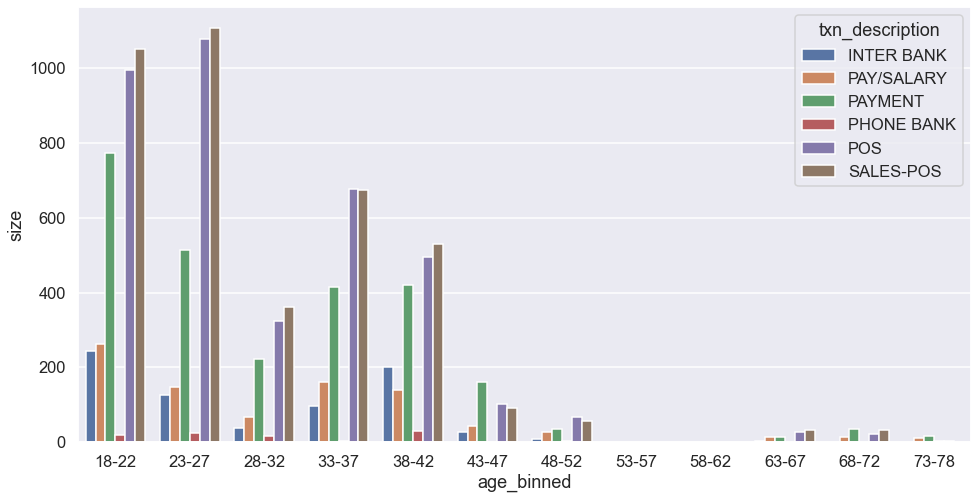

In [77]:
df_test = df.groupby(['age_binned','txn_description'], as_index = False)['transaction_id'].size()

plt.figure(figsize =(16, 8))
sns.barplot(data = df_test, 
                  x= "age_binned", 
                  y = 'size', 
                  hue = 'txn_description', 
                  ci=None, 
                  )
plt.show()

In [ ]:
df = df.drop(columns = ['status', 'card_present_flag','bpay_biller_code', 'account', 'currency', 'long_lat', 'merchant_id', 'merchant_code', 'first_name', 'date', 'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'customer_id', 'merchant_long_lat'])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
lm = LinearRegression()
score = cross_val_score(lm, X_train_scaled, y_train, cv = 80, scoring = 'neg_root_mean_squared_error')
print(score.mean())

In [ ]:
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print(-RMSE)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = DecisionTreeRegressor()
pipe = Pipeline([('scaler', scaler), ('DT_model', clf)])
param_grid = {'DT_model__max_depth':[1,2,3,4,6,8,10]}
grid = GridSearchCV(pipe, cv = 5, param_grid = param_grid)

In [ ]:
grid.fit(X_train, y_train)


In [ ]:
grid.best_score_

In [ ]:
grid.best_params_